In [6]:
import deepxde as dde
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
def pde(x, u):
    du_x = tf.gradients(u, x)[0]
    du_x, du_y, du_t = du_x[:, 0:1], du_x[1:2], du_x[2:3]
    du_xx = tf.gradients(du_x, x)[0][:, 0:1]
    du_yy = tf.gradients(du_y, x)[0][:, 1:2]
    
    return (du_t - 0.5*(du_xx + du_yy))

In [8]:
def func(x):
    return 80*np.sin(np.pi * x[:, 0:1])

In [9]:

geom = dde.geometry.geometry_2d.Rectangle([0, 0], [2, 2])
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [10]:
bc = dde.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.IC(geomtime, func, lambda _, on_initial: on_initial)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain = 8000,
    num_boundary = 2000,
    num_initial = 3000,
    solution = func,
    num_test = 1000
)

In [12]:
layers = [3] + [32] * 4 + [1]

activation = "tanh"
initializer = "Glorot uniform"

net = dde.maps.FNN(layers, activation, initializer)
model= dde.Model(data, net)
model.compile("adam", lr =0.001)

losshistory, train_state = model.train(iterations = 20000)



Compiling model...
Building feed-forward neural network...
'build' took 0.107657 s

'compile' took 1.497355 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.90e-02, 1.60e+03, 3.21e+03]    [3.89e-02, 1.60e+03, 3.21e+03]    []  
1000      [3.75e+02, 8.75e+02, 1.32e+03]    [1.09e+01, 8.75e+02, 1.32e+03]    []  
2000      [3.11e+02, 6.02e+02, 1.12e+03]    [9.35e+00, 6.02e+02, 1.12e+03]    []  
3000      [1.99e+02, 5.64e+02, 1.10e+03]    [4.78e+00, 5.64e+02, 1.10e+03]    []  
4000      [1.89e+02, 5.34e+02, 1.08e+03]    [4.26e+00, 5.34e+02, 1.08e+03]    []  
5000      [1.76e+02, 5.14e+02, 1.08e+03]    [3.44e+00, 5.14e+02, 1.08e+03]    []  
6000      [1.85e+02, 4.94e+02, 1.07e+03]    [2.64e+00, 4.94e+02, 1.07e+03]    []  
7000      [1.86e+02, 4.82e+02, 1.07e+03]    [2.18e+00, 4.82e+02, 1.07e+03]    []  
8000      [1.53e+02, 4.82e+02, 1.09e+03]    [9.42e-01, 4.82e+02, 1.09e+03]    []  
9000   

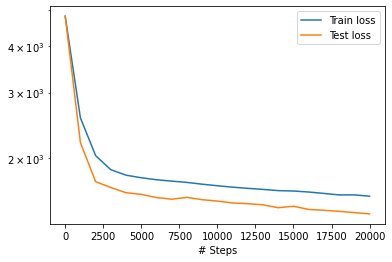

In [13]:
dde.saveplot(losshistory, train_state, issave = False, isplot = True)

In [14]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
t = np.linspace(0, 1, 21)
test_x, test_t, test_y = np.meshgrid(x, t, y)
test_domain = np.vstack((np.ravel(test_x), np.ravel(test_y), np.ravel(test_t))).T

predicted_solution = model.predict(test_domain)
residual = model.predict(test_domain, operator = pde)

In [15]:
residual.shape

(210000, 3)

In [16]:
predicted_solution = predicted_solution.reshape(100, 100, 21)
residual = residual.reshape(100, 100, 63)

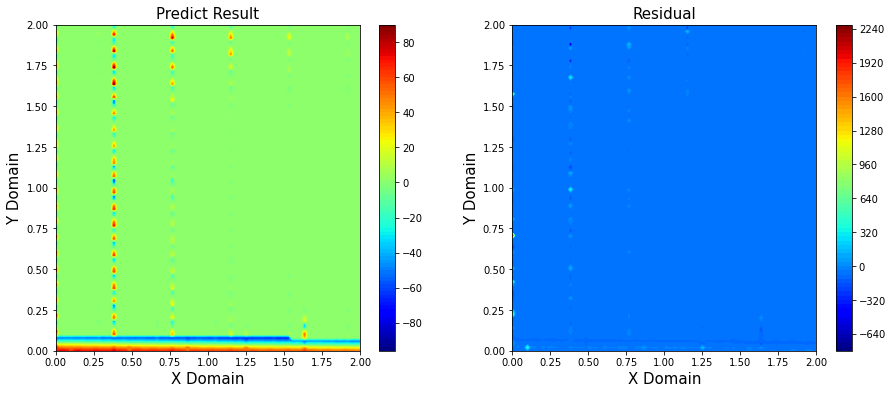

In [17]:

fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Predict Result", fontsize = 15)
ax.set_xlabel("X Domain", fontsize = 15)
ax.set_ylabel("Y Domain", fontsize = 15)
cs = ax.contourf(x, y, predicted_solution[:,:,0], 100, cmap = "jet")
cbar = fig.colorbar(cs)


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Residual", fontsize = 15)
ax2.set_xlabel("X Domain", fontsize = 15)
ax2.set_ylabel("Y Domain", fontsize = 15)
cs2 = ax2.contourf(x, y, residual[:,:,1], 100, cmap = "jet")
cbar2 = fig.colorbar(cs2)

plt.show()

# Quick start

In [3]:
import deepxde as dde
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def pde(x, u):
    du_x = tf.gradients(u, x)[0]
    du_x, du_y, du_t = du_x[:, 0:1], du_x[1:2], du_x[2:3]
    du_xx = tf.gradients(du_x, x)[0][:, 0:1]
    du_yy = tf.gradients(du_y, x)[0][:, 1:2]
    
    return (du_t - 0.5*(du_xx + du_yy))

def func(x):
    return 80*np.sin(np.pi * x[:, 0:1])*np.exp(-x[:, 1:2])


geom = dde.geometry.geometry_2d.Rectangle([0, 0], [2, 2])
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.IC(geomtime, func, lambda _, on_initial: on_initial)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain = 8000,
    num_boundary = 2000,
    num_initial = 3000,
    solution = func,
    num_test = 1000
)

layers = [3] + [32] * 2 + [1]

activation = "tanh"
initializer = "Glorot uniform"

Compiling model...
Building feed-forward neural network...
'build' took 0.063501 s

'compile' took 0.755183 s

Initializing variables...
Training model...

0         [7.96e-02, 8.10e+02, 7.78e+02]    [8.00e-02, 8.10e+02, 7.78e+02]    []  
1000      [9.16e+01, 4.69e+02, 3.35e+02]    [1.30e+01, 4.69e+02, 3.35e+02]    []  
2000      [9.40e+01, 3.37e+02, 2.72e+02]    [1.15e+00, 3.37e+02, 2.72e+02]    []  
3000      [7.17e+01, 2.99e+02, 2.66e+02]    [7.63e-01, 2.99e+02, 2.66e+02]    []  
4000      [5.97e+01, 2.85e+02, 2.66e+02]    [3.97e-01, 2.85e+02, 2.66e+02]    []  
5000      [5.46e+01, 2.77e+02, 2.66e+02]    [2.67e-01, 2.77e+02, 2.66e+02]    []  
6000      [5.21e+01, 2.69e+02, 2.66e+02]    [2.17e-01, 2.69e+02, 2.66e+02]    []  
7000      [5.16e+01, 2.63e+02, 2.66e+02]    [1.55e-01, 2.63e+02, 2.66e+02]    []  
8000      [5.14e+01, 2.58e+02, 2.66e+02]    [1.39e-01, 2.58e+02, 2.66e+02]    []  
9000      [5.27e+01, 2.49e+02, 2.66e+02]    [1.23e-01, 2.49e+02, 2.66e+02]    []  
10000     [5.5

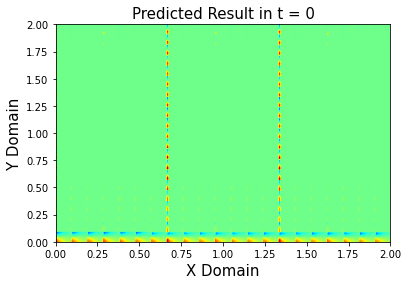

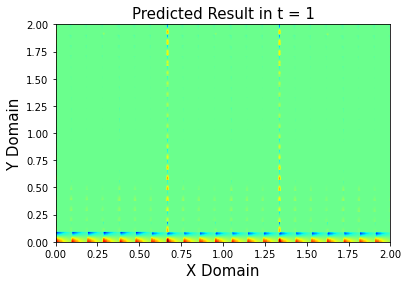

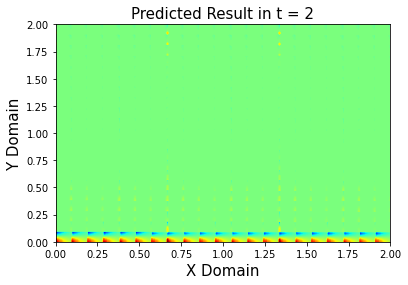

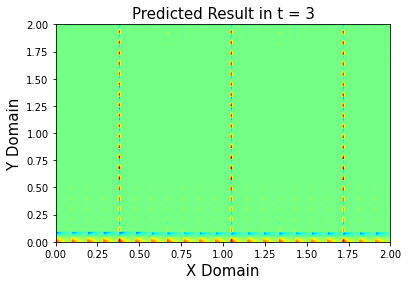

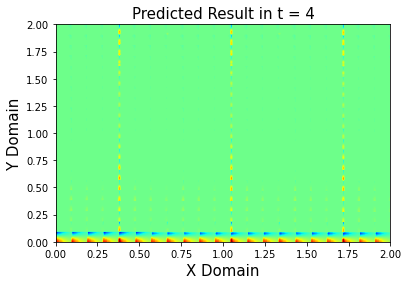

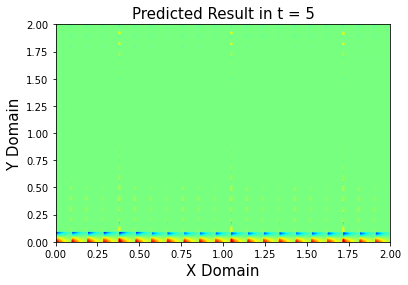

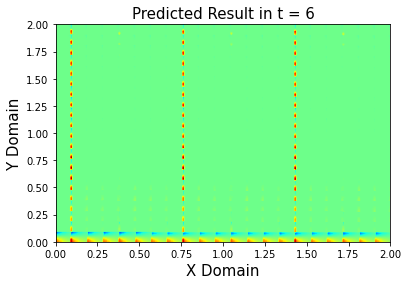

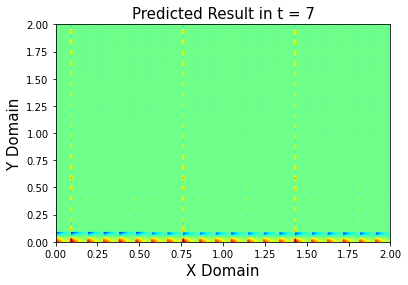

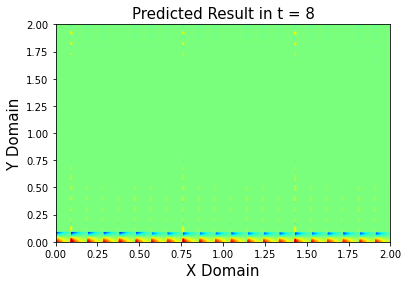

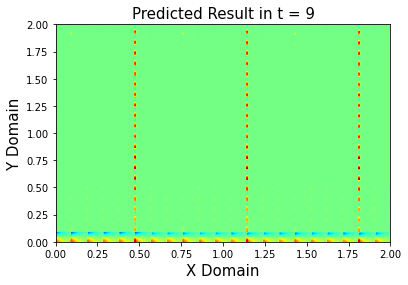

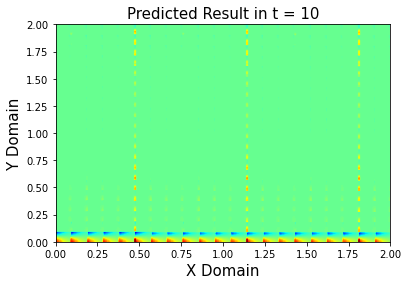

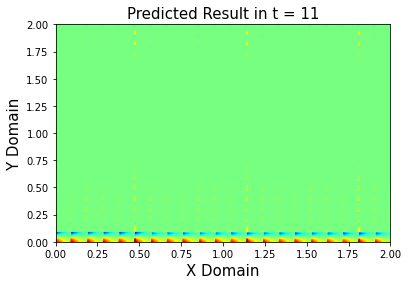

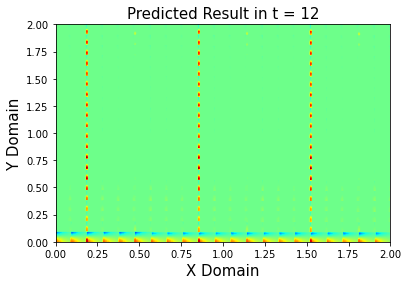

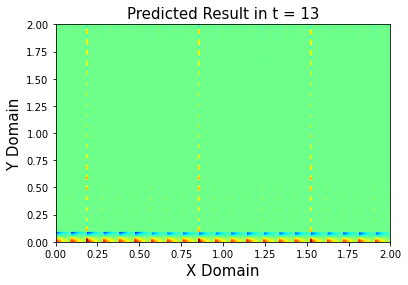

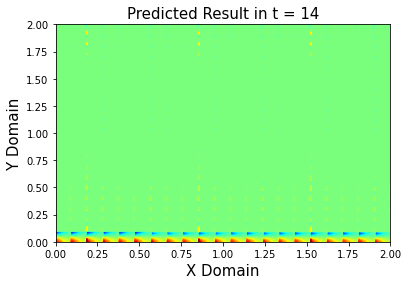

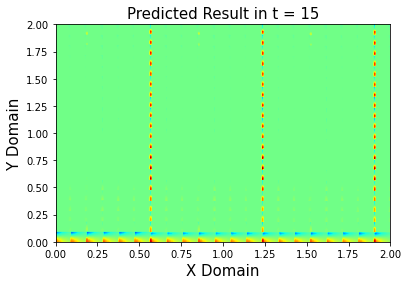

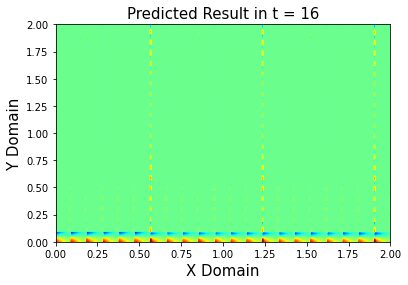

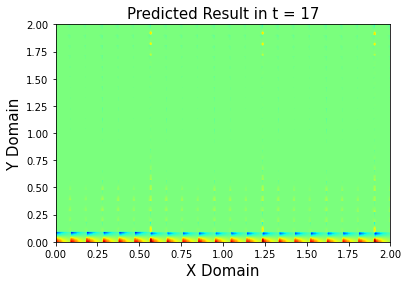

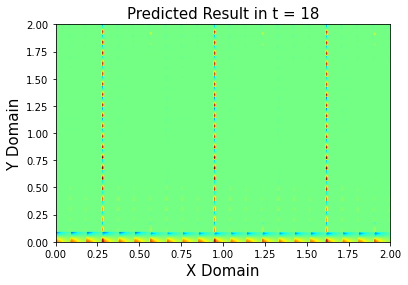

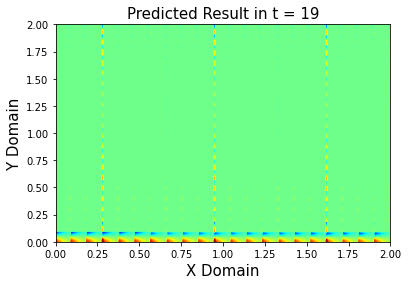

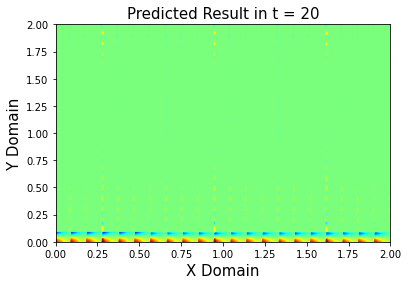

In [5]:
net = dde.maps.FNN(layers, activation, initializer)
model= dde.Model(data, net)
model.compile("adam", lr =0.001)

losshistory, train_state = model.train(iterations = 20000)

x = np.linspace(0, 2, 300)
y = np.linspace(0, 2, 300)
t = np.linspace(0, 1, 21)
test_x, test_t, test_y = np.meshgrid(x, t, y)
test_domain = np.vstack((np.ravel(test_x), np.ravel(test_y), np.ravel(test_t))).T

predicted_solution = model.predict(test_domain)
residual = model.predict(test_domain, operator = pde)

predicted_solution = predicted_solution.reshape(300, 300, 21)
residual = residual.reshape(300, 300, 63)

plt.ion()
for i in range(21):
    plt.cla()
    plt.title(f"Predicted Result in t = {i}", fontsize = 15)
    plt.xlabel("X Domain", fontsize = 15)
    plt.ylabel("Y Domain", fontsize = 15)
    plt.contourf(x, y, predicted_solution[:,:,i], 200, cmap = "jet")
    plt.pause(0.1)
    plt.show()